In [411]:
import numpy as np
from PIL import Image, ImageFilter
from numpy import convolve as conv

In [430]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.filter(ImageFilter.GaussianBlur(radius=2))  # Apply Gaussian blur for noise reduction
    return image


In [431]:
def histogram_equalization(image):
    histogram, bins = np.histogram(np.array(image).flatten(), 256, density=True)
    cumulative_distribution = histogram.cumsum()
    cumulative_distribution = 255 * cumulative_distribution / cumulative_distribution[-1]

    equalized_image = np.interp(image, bins[:-1], cumulative_distribution)
    result = Image.fromarray(equalized_image.astype(np.uint8).reshape((image.size[1], image.size[0])))
    return result


In [432]:
def sobel_filter(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2], 
                        [-1, 0, 1]])    
    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    gradient_x = image.filter(ImageFilter.Kernel((3, 3), sobel_x.flatten() ,1,0))
    gradient_y = image.filter(ImageFilter.Kernel((3, 3), sobel_y.flatten(),1,0))

    # gradient_x = np.abs(image.filter(ImageFilter.Kernel((3, 3), sobel_x)))

    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    
    result = gradient_magnitude.reshape((image.size[1], image.size[0]))
    result = gradient_magnitude.astype(np.uint8)
    result = Image.fromarray(result)
    return result


In [433]:
def laplace_filter(image):
    laplace = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

    gradient = image.filter(ImageFilter.Kernel((3, 3), laplace.flatten() ,1,0))

    return gradient

In [434]:
def binarize_image(image, threshold):
    image = np.array(image)
    return Image.fromarray(((image > threshold)*255).astype(np.uint8))

In [435]:
def pattern_matching(image, pattern):
    image_width, image_height = image.size
    pattern_width, pattern_height = pattern.size

    for x in range(image_width - pattern_width):
        for y in range(image_height - pattern_height):
            region = image.crop((x, y, x + pattern_width, y + pattern_height))
            difference = np.abs(np.array(region) - np.array(pattern))
            if np.mean(difference) < 10:  # should adjust
                return True

    return False


In [436]:
def process(image_path):
    image = preprocess_image(image_path)
    image = histogram_equalization(image)
    image = laplace_filter(image)
    image = histogram_equalization(image)
    image = binarize_image(image, 205)

    return image

In [437]:
def detect_coins(image_path):
    image = process(image_path)
    coin_count = [0 for _ in range(4)]

    # Load the pattern image of a coin to match against
    coin_pattern_10 = process("coin_template/10.png")
    coin_pattern_10_2 = process("coin_template/10_2.png")
    coin_pattern_50 = process("coin_template/50.png")
    coin_pattern_50_2 = process("coin_template/50_2.png")
    coin_pattern_100 = process("coin_template/100.png")
    coin_pattern_100_2 = process("coin_template/100_2.png")
    coin_pattern_500 = process("coin_template/500.png")
    coin_pattern_500_2 = process("coin_template/500_2.png")

    if pattern_matching(image, coin_pattern_10) or pattern_matching(image, coin_pattern_10_2):
        print("10won Coin detected!")
        coin_count[0]+=1
    elif pattern_matching(image, coin_pattern_50) or pattern_matching(image, coin_pattern_50_2):
        print("50won Coin detected!")
        coin_count[1]+=1
    elif pattern_matching(image, coin_pattern_100)or pattern_matching(image, coin_pattern_100_2):
        print("100won Coin detected!")
        coin_count[2]+=1
    elif pattern_matching(image, coin_pattern_500)or pattern_matching(image, coin_pattern_500_2):
        print("500won Coin detected!")
        coin_count[3]+=1



Test

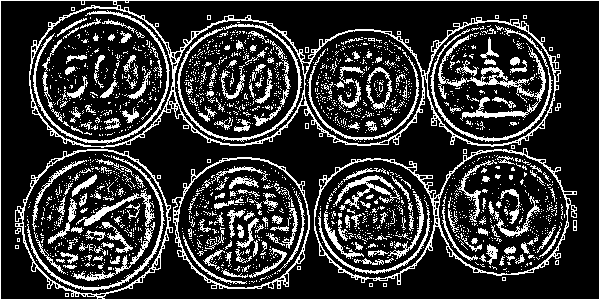

In [438]:
image_path = ("image/1.jpg")

image = process(image_path)

image.show()